# SLP Test

Explorando classificador **Perceptron** com conjunto de dados da iris, seguindo o [tutorial](https://chrisalbon.com/machine_learning/basics/perceptron_in_scikit-learn/).

## Importando bibliotecas

In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix

## Carregando _dataset_

In [2]:
irisDS = load_iris()

X = irisDS.data
y = irisDS.target
irisDS.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Separando dados para treino e teste

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Pré-processando os dados de treino

In [4]:
# Train the scaler, which standarizes all the features to have mean=0 and unit variance
sc = StandardScaler()

sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [5]:
X_train_std = sc.transform(X_train)

X_test_std = sc.transform(X_test)

## Instanciando, treinando, testando e exibindo resultados do classificador


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.94      0.94      0.94        18
   virginica       0.91      0.91      0.91        11

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



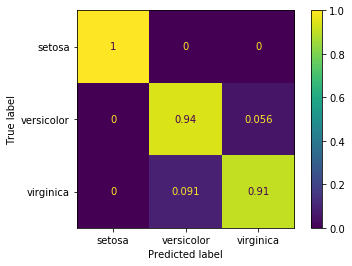

In [7]:
classifier = Perceptron(max_iter=30, eta0=0.1, random_state=0)

classifier.fit(X_train_std, y_train)

y_pred = classifier.predict(X_test_std)

print('\n' + classification_report(y_test, y_pred, target_names=irisDS.target_names))

plot_confusion_matrix(
    estimator=classifier,
    X=X_test_std,
    y_true=y_test,
    display_labels=irisDS.target_names,
    normalize='true'
)